# 1- Boston house price prediction

## 1-1 Import libraries

In [1]:
from tensorflow.keras import models, layers
import matplotlib.pyplot as plt
import seaborn as sns
%config InlineBackend.figure_format = 'retina'

/Users/kenny_jung/Library/Python/3.9/lib/python/site-packages/urllib3/__init__.py:34: NotOpenSSLWarning: urllib3 v2 only supports OpenSSL 1.1.1+, currently the 'ssl' module is compiled with 'LibreSSL 2.8.3'. See: https://github.com/urllib3/urllib3/issues/3020
  warnings.warn(


## 1-2 Load dataset

In [2]:
# keras.datasets 안에 boston_housing 데이터셋을 로드합니다.
from keras.datasets import boston_housing

(train_data, train_labels), (test_data, test_labels) = boston_housing.load_data()

# 데이터셋의 크기를 확인합니다.
print(len(train_data))
print(len(test_data))

404
102


In [3]:
print(train_data.shape, train_labels.shape, test_data.shape, test_labels.shape)

(404, 13) (404,) (102, 13) (102,)


## 1-3 Standard scaling

In [4]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(train_data)
train_data = scaler.transform(train_data)
test_data = scaler.transform(test_data)

## 1-4 DNN model design

In [38]:
from tensorflow.keras import models, layers
from tensorflow.keras import callbacks
import keras

model = models.Sequential()
model.add(layers.Input(shape=(13,)))

model.add(layers.Dense(128, kernel_regularizer=keras.regularizers.l2(0.00001)))
model.add(layers.BatchNormalization())
model.add(layers.Activation('relu')) 

model.add(layers.Dropout(0.01))

model.add(layers.Dense(128, kernel_regularizer=keras.regularizers.l2(0.00001)))
model.add(layers.BatchNormalization())
model.add(layers.Activation('relu')) 

model.add(layers.Dropout(0.01))

model.add(layers.Dense(1))
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_15 (Dense)            (None, 128)               1792      
                                                                 
 batch_normalization_10 (Ba  (None, 128)               512       
 tchNormalization)                                               
                                                                 
 activation_10 (Activation)  (None, 128)               0         
                                                                 
 dropout_6 (Dropout)         (None, 128)               0         
                                                                 
 dense_16 (Dense)            (None, 128)               16512     
                                                                 
 batch_normalization_11 (Ba  (None, 128)               512       
 tchNormalization)                                    

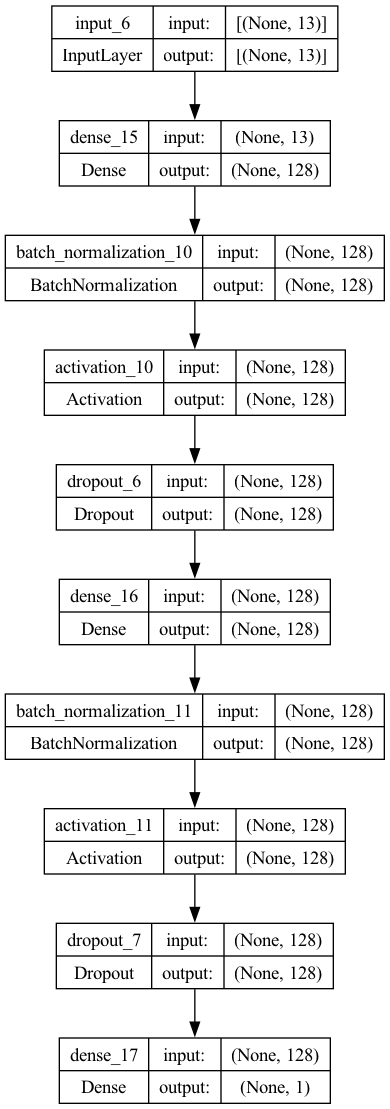

In [39]:
from keras.utils import plot_model
plot_model(model, show_shapes=True)

## 1-5 Complie model and training

In [40]:
model.compile(loss='mse',
              optimizer='SGD',
              metrics=['mae'])

check_point_cb = callbacks.ModelCheckpoint('boston_model.h5', 
                                           save_best_only=True)
early_stopping_cb = callbacks.EarlyStopping(patience=10, 
                                            monitor='val_loss',
                                            restore_best_weights=True)

history = model.fit(train_data, train_labels, 
                     epochs=60,
                     validation_data=(test_data, test_labels),
                     callbacks=[check_point_cb, early_stopping_cb])


Epoch 1/60
13/13 [==============================] - 1s 61ms/step - loss: 114.5812 - mae: 7.5352 - val_loss: 156.3482 - val_mae: 11.1365
Epoch 2/60
 7/13 [===============>..............] - ETA: 0s - loss: 35.8702 - mae: 4.3836

/Users/kenny_jung/Library/Python/3.9/lib/python/site-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


13/13 [==============================] - 0s 30ms/step - loss: 35.5064 - mae: 4.3256 - val_loss: 111.9579 - val_mae: 9.1871
Epoch 3/60
13/13 [==============================] - 0s 28ms/step - loss: 33.1630 - mae: 4.1849 - val_loss: 115.7952 - val_mae: 9.8469
Epoch 4/60
13/13 [==============================] - 0s 27ms/step - loss: 17.2675 - mae: 3.1082 - val_loss: 158.7413 - val_mae: 11.5014
Epoch 5/60
13/13 [==============================] - 0s 27ms/step - loss: 25.5101 - mae: 3.4772 - val_loss: 76.4683 - val_mae: 7.5314
Epoch 6/60
13/13 [==============================] - 0s 27ms/step - loss: 21.7618 - mae: 3.3083 - val_loss: 60.3430 - val_mae: 6.7132
Epoch 7/60
13/13 [==============================] - 0s 27ms/step - loss: 15.7889 - mae: 2.8421 - val_loss: 37.4923 - val_mae: 4.3613
Epoch 8/60
13/13 [==============================] - 0s 25ms/step - loss: 26.8404 - mae: 3.7761 - val_loss: 80.6477 - val_mae: 7.4297
Epoch 9/60
13/13 [==============================] - 0s 25ms/step - loss: 16.

In [41]:
print(history.history.keys())

dict_keys(['loss', 'mae', 'val_loss', 'val_mae'])


In [42]:
def show_history_r(history):
    history_dict = history.history

    loss = history_dict['loss']
    val_loss = history_dict['val_loss']

    epochs = range(1, len(loss) + 1)
    fig = plt.figure(figsize=(12, 5))

    ax1 = fig.add_subplot(1, 2, 1)
    ax1.plot(epochs, loss, 'b-', label='train_loss')
    ax1.plot(epochs, val_loss, 'r-', label='val_loss')
    ax1.set_title('Train and Validation Loss')
    ax1.set_xlabel('Epochs')
    ax1.set_ylabel('Loss')
    ax1.grid()
    ax1.legend()

    accuracy = history_dict['mae']
    val_accuracy = history_dict['val_mae']

    ax2 = fig.add_subplot(1, 2, 2)
    ax2.plot(epochs, accuracy, 'b-', label='train_mae')
    ax2.plot(epochs, val_accuracy, 'r-', label='val_mae')
    ax2.set_title('Train and Validation MAE')
    ax2.set_xlabel('Epochs')
    ax2.set_ylabel('MAE')
    ax2.grid()
    ax2.legend()

    plt.show()

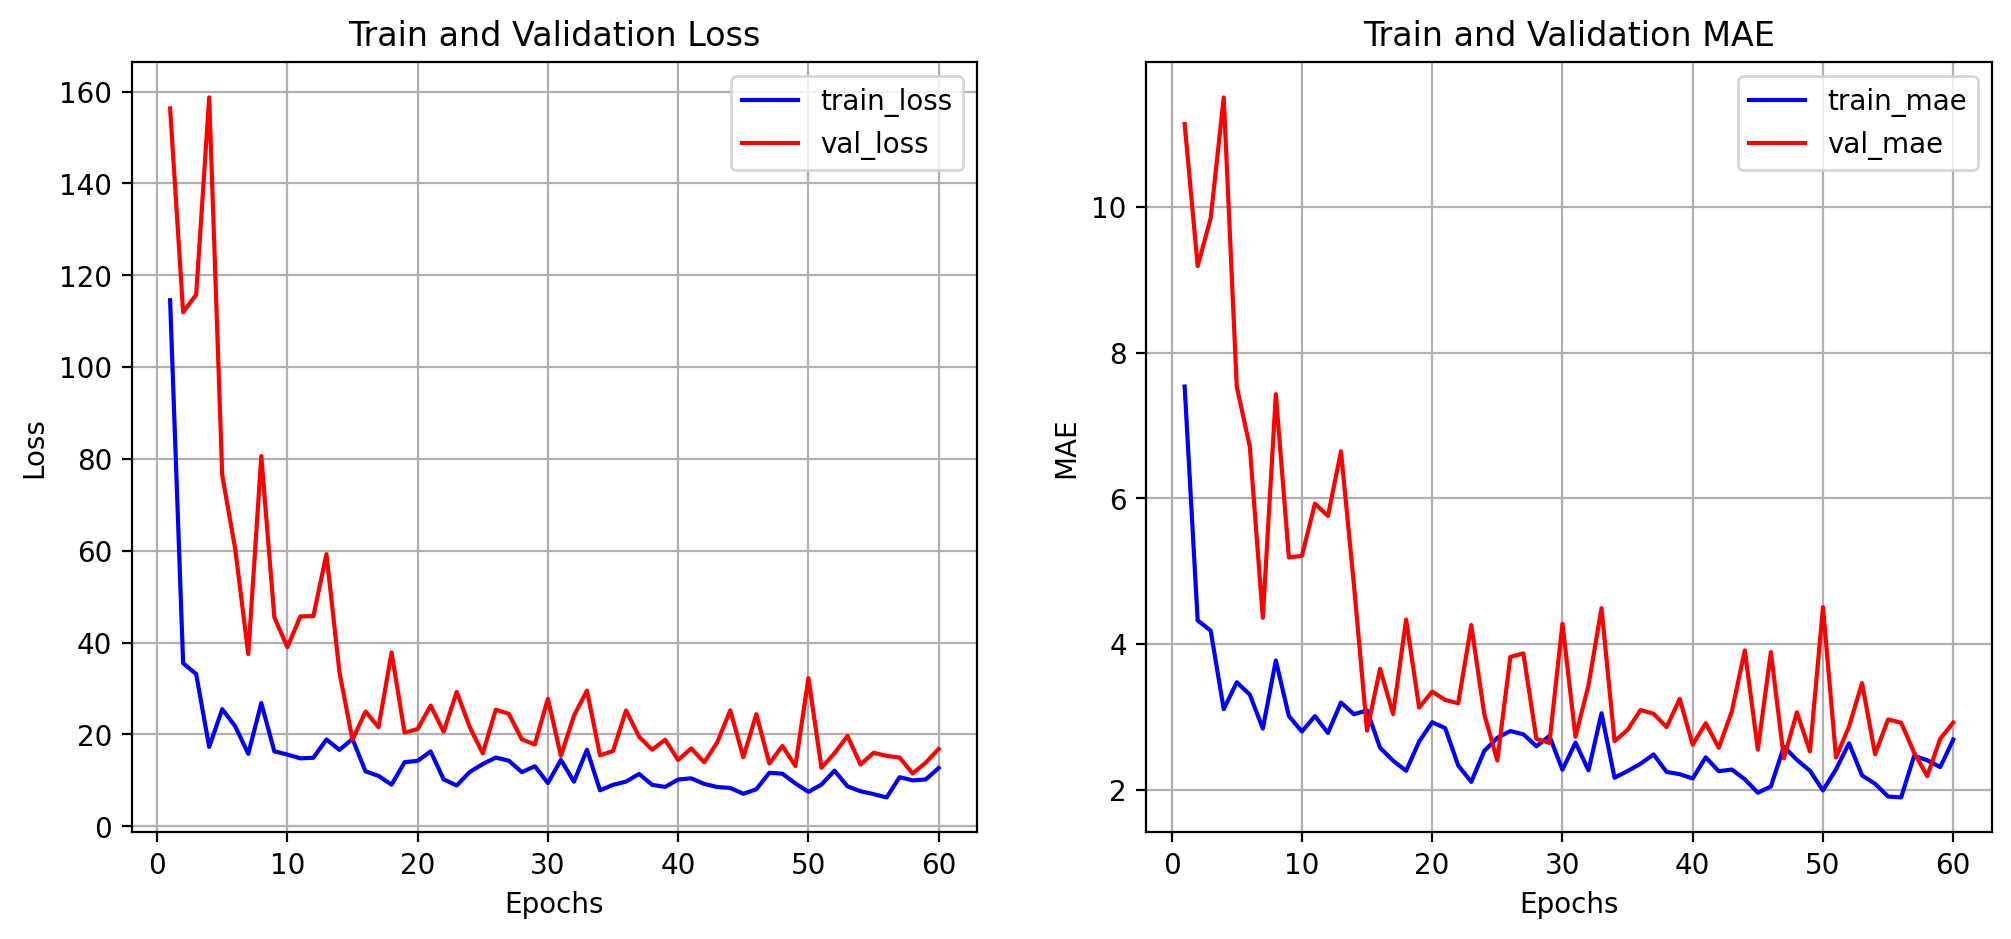

In [43]:
show_history_r(history)

## 1-6 Evaluation

In [35]:
model.evaluate(test_data, test_labels)

4/4 [==============================] - 0s 14ms/step - loss: 12.9665 - mae: 2.5124


[12.96645736694336, 2.5124359130859375]

4/4 [==============================] - 0s 12ms/step


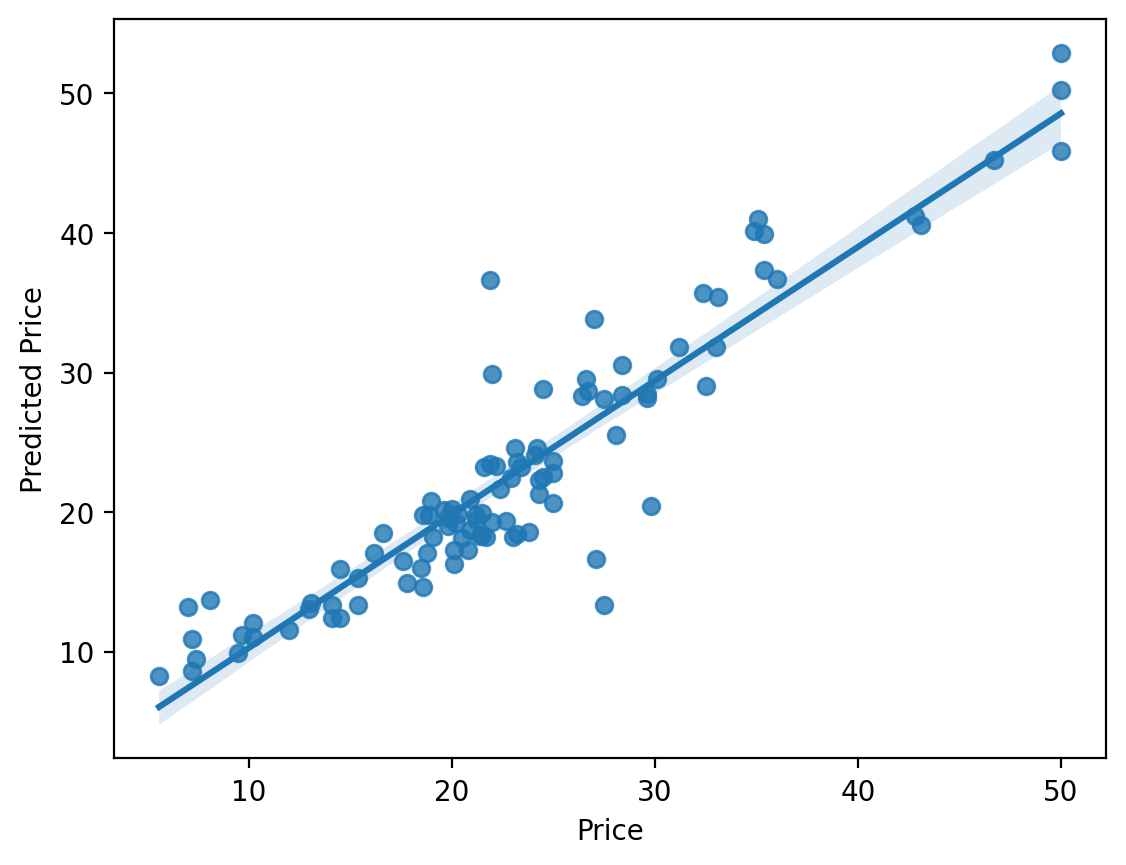

In [36]:
pred_y = model.predict(test_data)
sns.regplot(x = test_labels, y = pred_y)
plt.xlabel('Price')
plt.ylabel('Predicted Price')
plt.show()  

In [37]:
from sklearn.metrics import r2_score
r2_score(test_labels, pred_y)

0.8442651528339976

# 2- Reuters

## 2-1 Importing libraries

In [47]:
import numpy as np
import matplotlib.pyplot as plt
import keras
from sklearn.model_selection import train_test_split
from tensorflow.keras import models, layers
from tensorflow.keras import callbacks
from tensorflow.keras import utils
from keras.datasets import reuters

## 2-2 Load dataset

In [54]:
(train_data, train_labels), (test_data, test_labels) = reuters.load_data(num_words=20000)

train_data, val_data, train_labels, val_labels = train_test_split(train_data, train_labels, test_size=0.26)

print(train_data.shape, train_labels.shape, val_data.shape, val_labels.shape, test_data.shape, test_labels.shape)
print(len(train_data))
print(len(test_data))
print(len(val_data))
print(len(set(train_labels)))
print(len(train_data)+len(test_data)+len(val_data)) 

(6646,) (6646,) (2336,) (2336,) (2246,) (2246,)
6646
2246
2336
46
11228


## 2-3 Onehot encoding and transform labels to categories

In [55]:
def one_hot_encoding(data, dim=20000):
  results = np.zeros((len(data), dim))
  for i, d in enumerate(data):
    results[i, d] = 1.
  return results

x_train = one_hot_encoding(train_data)
x_val = one_hot_encoding(val_data)
x_test = one_hot_encoding(test_data)

from tensorflow.keras import utils

y_train = utils.to_categorical(train_labels)
y_val = utils.to_categorical(val_labels)
y_test = utils.to_categorical(test_labels)

In [56]:
print(x_train.shape, y_train.shape, x_val.shape, y_val.shape, x_test.shape, y_test.shape)

(6646, 20000) (6646, 46) (2336, 20000) (2336, 46) (2246, 20000) (2246, 46)


## 2-4 DNN model design

In [70]:
model = models.Sequential()
model.add(layers.Input(shape=(20000,)))

model.add(layers.Dense(128, kernel_regularizer=keras.regularizers.l2(0.01)))
model.add(layers.BatchNormalization())
model.add(layers.Activation('relu')) 

model.add(layers.Dropout(0.5))

model.add(layers.Dense(128, kernel_regularizer=keras.regularizers.l2(0.01)))
model.add(layers.BatchNormalization())
model.add(layers.Activation('relu')) 

model.add(layers.Dropout(0.5))

model.add(layers.Dense(46, activation='softmax', name='output'))

model.summary()

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_24 (Dense)            (None, 128)               2560128   
                                                                 
 batch_normalization_18 (Ba  (None, 128)               512       
 tchNormalization)                                               
                                                                 
 activation_18 (Activation)  (None, 128)               0         
                                                                 
 dropout_14 (Dropout)        (None, 128)               0         
                                                                 
 dense_25 (Dense)            (None, 128)               16512     
                                                                 
 batch_normalization_19 (Ba  (None, 128)               512       
 tchNormalization)                                    

## 2-5 Complie and training

In [71]:
model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [72]:
check_point_cb = callbacks.ModelCheckpoint('reuters_model.h5', 
                                           save_best_only=True)
early_stopping_cb = callbacks.EarlyStopping(patience=10, 
                                            monitor='val_loss',
                                            restore_best_weights=True)

history = model.fit(x_train, y_train,
                    epochs=60,
                    batch_size=512,
                    validation_data=(x_val, y_val),
                    callbacks=[check_point_cb, early_stopping_cb])

Epoch 1/60
13/13 [==============================] - 2s 99ms/step - loss: 4.8278 - accuracy: 0.4409 - val_loss: 5.2031 - val_accuracy: 0.6948
Epoch 2/60
13/13 [==============================] - 1s 45ms/step - loss: 3.1443 - accuracy: 0.6777 - val_loss: 4.7298 - val_accuracy: 0.7115
Epoch 3/60
13/13 [==============================] - 1s 45ms/step - loss: 2.6025 - accuracy: 0.7335 - val_loss: 4.3322 - val_accuracy: 0.7055
Epoch 4/60
13/13 [==============================] - 1s 44ms/step - loss: 2.2158 - accuracy: 0.7680 - val_loss: 4.0101 - val_accuracy: 0.6755
Epoch 5/60
13/13 [==============================] - 1s 46ms/step - loss: 1.9463 - accuracy: 0.7881 - val_loss: 3.7207 - val_accuracy: 0.6584
Epoch 6/60
13/13 [==============================] - 1s 43ms/step - loss: 1.7129 - accuracy: 0.8118 - val_loss: 3.4690 - val_accuracy: 0.6327
Epoch 7/60
13/13 [==============================] - 1s 46ms/step - loss: 1.5417 - accuracy: 0.8258 - val_loss: 3.2585 - val_accuracy: 0.6203
Epoch 8/60
13

In [73]:
def show_history_c(history):
    history_dict = history.history

    loss = history_dict['loss']
    val_loss = history_dict['val_loss']

    epochs = range(1, len(loss) + 1)
    fig = plt.figure(figsize=(12, 5))

    ax1 = fig.add_subplot(1, 2, 1)
    ax1.plot(epochs, loss, 'b-', label='train_loss')
    ax1.plot(epochs, val_loss, 'r-', label='val_loss')
    ax1.set_title('Train and Validation Loss')
    ax1.set_xlabel('Epochs')
    ax1.set_ylabel('Loss')
    ax1.grid()
    ax1.legend()

    accuracy = history_dict['accuracy']
    val_accuracy = history_dict['val_accuracy']

    ax2 = fig.add_subplot(1, 2, 2)
    ax2.plot(epochs, accuracy, 'b-', label='train_accuracy')
    ax2.plot(epochs, val_accuracy, 'r-', label='val_accuracy')
    ax2.set_title('Train and Validation Accuracy')
    ax2.set_xlabel('Epochs')
    ax2.set_ylabel('Accuracy')
    ax2.grid()
    ax2.legend()

    plt.show()

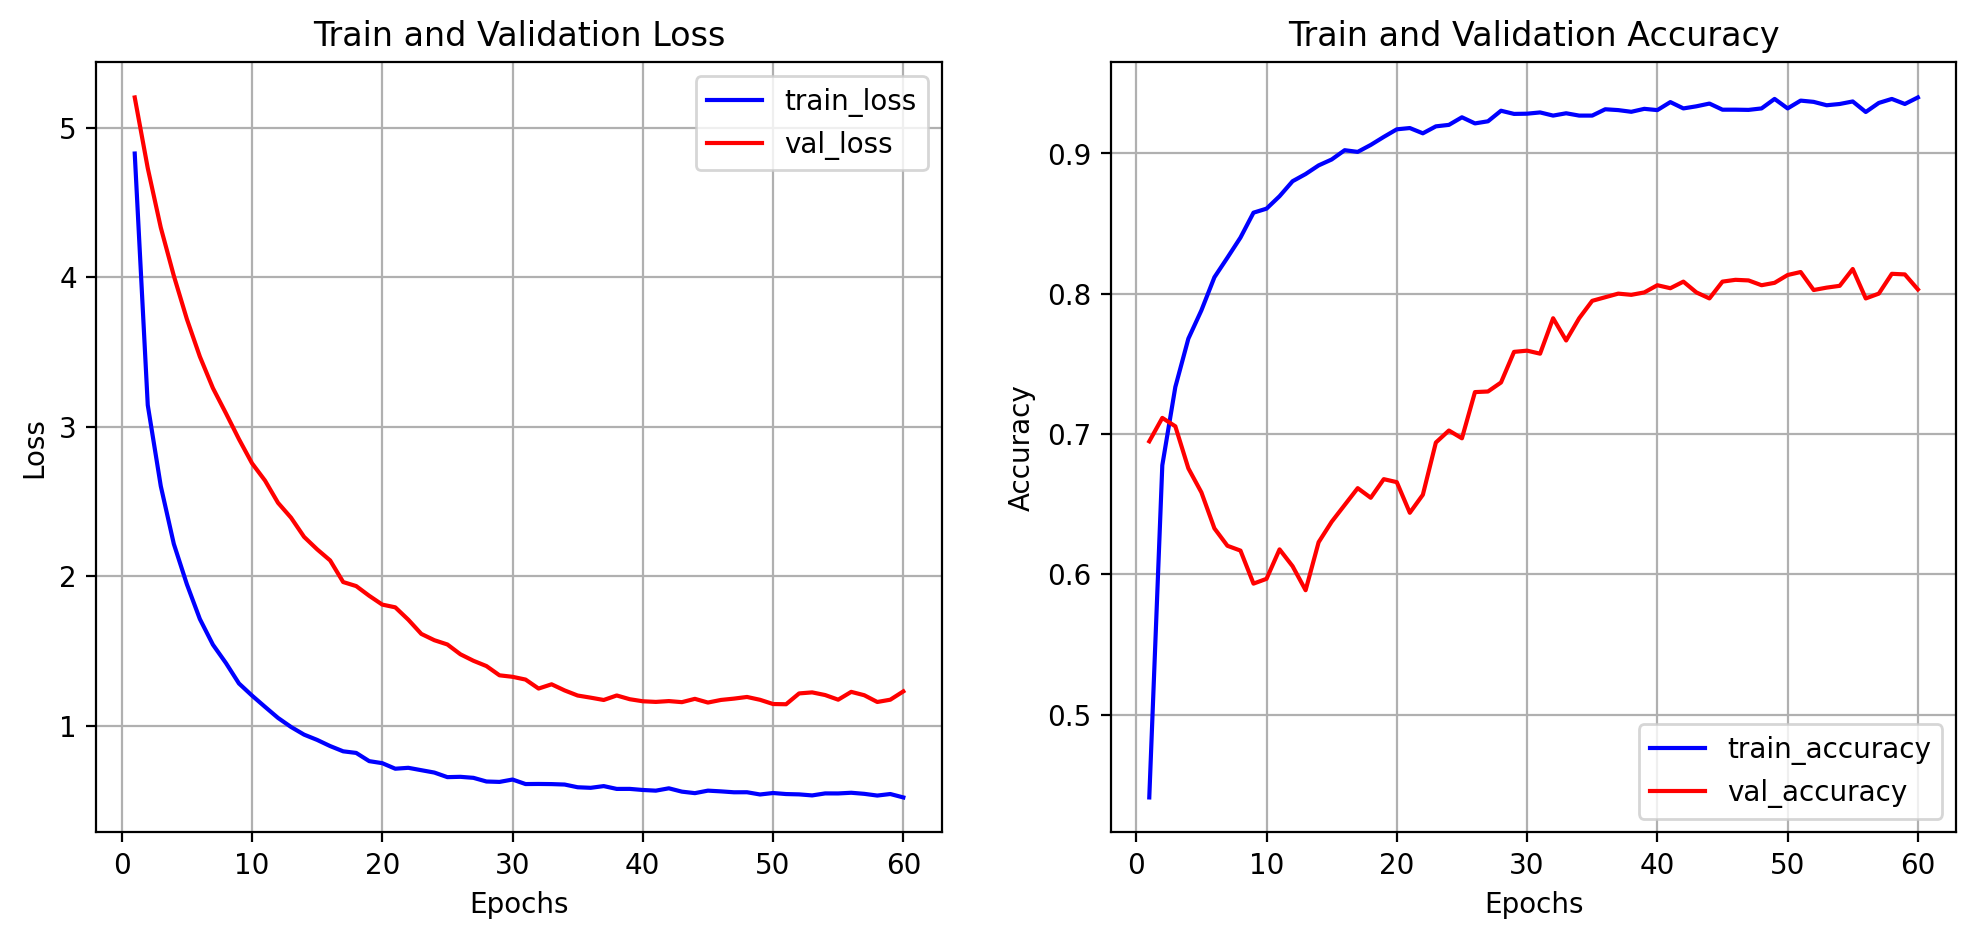

In [74]:
show_history_c(history)

## 2-6 Evaluation

In [75]:
model.evaluate(x_test, y_test)

71/71 [==============================] - 2s 21ms/step - loss: 1.3251 - accuracy: 0.7783


[1.3250527381896973, 0.7782725095748901]

# 3- CIFAR10

## 3-1 Import libraries

In [1]:
import matplotlib.pyplot as plt
import keras
from sklearn.model_selection import train_test_split
from tensorflow.keras import callbacks

from tensorflow.keras import models, layers
from tensorflow.keras.datasets import cifar10

/Users/kenny_jung/Library/Python/3.9/lib/python/site-packages/urllib3/__init__.py:34: NotOpenSSLWarning: urllib3 v2 only supports OpenSSL 1.1.1+, currently the 'ssl' module is compiled with 'LibreSSL 2.8.3'. See: https://github.com/urllib3/urllib3/issues/3020
  warnings.warn(


## 3-2 Load dataset & split

In [2]:
(x_train_full, y_train_full), (x_test, y_test) = cifar10.load_data()

x_train, x_val, y_train, y_val = train_test_split(x_train_full, y_train_full,
                                                  test_size=0.3,
                                                  random_state=123)

print("전체 학습 데이터: {} 레이블: {}".format(x_train_full.shape, y_train_full.shape))
print("학습 데이터: {} 레이블: {}".format(x_train.shape, y_train.shape))
print("검증 데이터: {} 레이블: {}".format(x_val.shape, y_val.shape))
print("테스트 데이터: {} 레이블: {}".format(x_test.shape, y_test.shape))

전체 학습 데이터: (50000, 32, 32, 3) 레이블: (50000, 1)
학습 데이터: (35000, 32, 32, 3) 레이블: (35000, 1)
검증 데이터: (15000, 32, 32, 3) 레이블: (15000, 1)
테스트 데이터: (10000, 32, 32, 3) 레이블: (10000, 1)


In [3]:
print(x_val)
print(type(x_val))

[[[[163 163 173]
   [159 159 168]
   [160 160 168]
   ...
   [159 161 173]
   [159 161 173]
   [159 161 173]]

  [[161 161 171]
   [158 158 167]
   [161 161 169]
   ...
   [159 162 173]
   [159 161 174]
   [159 161 174]]

  [[158 158 168]
   [156 156 166]
   [160 160 169]
   ...
   [158 160 172]
   [158 160 173]
   [159 161 174]]

  ...

  [[119 108  62]
   [123 106  52]
   [132 113  60]
   ...
   [128 107  65]
   [ 86  78  35]
   [ 73  78  31]]

  [[105 101  44]
   [113 101  43]
   [101  90  40]
   ...
   [137 113  71]
   [ 83  76  35]
   [ 61  73  24]]

  [[ 86  89  26]
   [107  99  39]
   [ 91  84  28]
   ...
   [123 106  61]
   [ 80  76  30]
   [ 71  80  29]]]


 [[[157 144 106]
   [162 148 110]
   [170 157 116]
   ...
   [228 221 201]
   [168 167 163]
   [102 101  91]]

  [[154 143 106]
   [161 148 110]
   [168 157 115]
   ...
   [229 222 196]
   [201 206 206]
   [107 109 101]]

  [[146 137 105]
   [155 144 112]
   [165 156 117]
   ...
   [244 240 221]
   [221 226 227]
   [113 115

In [4]:
# cifar10의 분류에 해당하는 'airplane', 'automobile', 'bird', 'cat', 'deer', 
# 'dog', 'frog', 'horse', 'ship', 'truck'를 class_name으로 정의합니다.
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

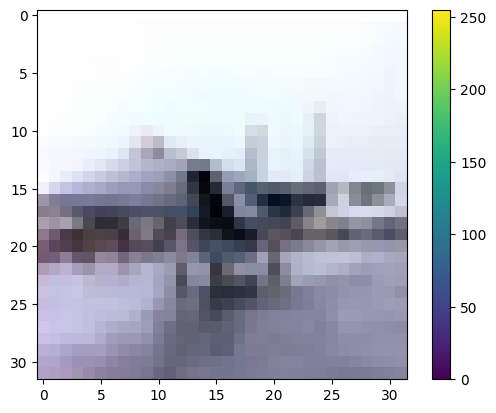

0 : airplane


/var/folders/b9/d_8nll_s47g6w2x0spndwwl80000gn/T/ipykernel_4524/1731880996.py:7: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print(int(y_train[number]), ':', class_names[int(y_train[number])])


In [5]:
# 훈련 데이터의 0번째인 x_train[0]를 이미지로 시각화합니다.
number = 122
plt.figure()
plt.imshow(x_train[number])
plt.colorbar()
plt.show()
print(int(y_train[number]), ':', class_names[int(y_train[number])])


## 3-3 Reshape & normalization

In [6]:
# x_train = x_train.reshape(-1, 32 * 32 * 3)
# x_val = x_val.reshape(-1, 32 * 32 * 3)
# x_test = x_test.reshape(-1, 32 * 32 * 3)

# print(x_train.shape, y_train.shape)
# print(x_val.shape, y_val.shape)
# print(x_test.shape, y_test.shape)

In [7]:
# y_train = y_train.ravel()
# y_val = y_val.ravel()
# y_test = y_test.ravel()

In [8]:
x_train = x_train / 255.
x_val = x_val / 255.
x_test = x_test / 255.

In [9]:
print(x_train.shape, y_train.shape)
print(x_val.shape, y_val.shape)
print(x_test.shape, y_test.shape)

(35000, 32, 32, 3) (35000, 1)
(15000, 32, 32, 3) (15000, 1)
(10000, 32, 32, 3) (10000, 1)


In [10]:
from keras.utils import to_categorical

# Convert the labels to one-hot encoding
y_train = to_categorical(y_train)
y_val = to_categorical(y_val)
y_test = to_categorical(y_test)

## 3-4 DNN model design

In [11]:
# model = models.Sequential()
# model.add(layers.Input(shape=(3072)))

# model.add(layers.Dense(512, kernel_regularizer=keras.regularizers.l2(0.01)))
# model.add(layers.BatchNormalization())
# model.add(layers.Activation('relu')) 

# model.add(layers.Dropout(0.3))

# model.add(layers.Dense(512, kernel_regularizer=keras.regularizers.l2(0.01)))
# model.add(layers.BatchNormalization())
# model.add(layers.Activation('relu')) 

# model.add(layers.Dropout(0.3))

# model.add(layers.Dense(512, kernel_regularizer=keras.regularizers.l2(0.01)))
# model.add(layers.BatchNormalization())
# model.add(layers.Activation('relu')) 

# model.add(layers.Dropout(0.3))

# model.add(layers.Dense(10, activation='softmax'))

# model.summary()

In [36]:
# model = models.Sequential()
# model.add(keras.layers.Conv2D(64, (3,3), activation='sigmoid', input_shape=(32, 32, 3)))
# model.add(keras.layers.MaxPool2D(2,2))
# model.add(keras.layers.Dropout(0.2))

# model.add(keras.layers.Conv2D(64, (3,3), activation='sigmoid'))
# model.add(keras.layers.MaxPooling2D((2,2)))
# model.add(keras.layers.Dropout(0.2))

# model.add(keras.layers.Flatten())
# model.add(keras.layers.Dense(64, activation='sigmoid'))
# model.add(keras.layers.Dropout(0.2))

# model.add(keras.layers.Dense(10, activation='softmax'))

# print('Model에 추가된 Layer 개수: ', len(model.layers))

Model에 추가된 Layer 개수:  10


In [51]:
model = models.Sequential()
model.add(keras.layers.Conv2D(128, (3,3), input_shape=(32, 32, 3)))
model.add(keras.layers.BatchNormalization())  # Add BatchNormalization layer before activation
model.add(keras.layers.Activation('sigmoid'))  # Apply activation
model.add(keras.layers.MaxPool2D(2,2))
model.add(keras.layers.Dropout(0.3))  # Add dropout layer after activation and pooling

model.add(keras.layers.Conv2D(128, (3,3)))
model.add(keras.layers.BatchNormalization())  # Add BatchNormalization layer before activation
model.add(keras.layers.Activation('sigmoid'))  # Apply activation
model.add(keras.layers.MaxPooling2D((2,2)))
model.add(keras.layers.Dropout(0.3))  # Add dropout layer after activation and pooling

model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(64))
# model.add(keras.layers.BatchNormalization())  # Add BatchNormalization layer before activation
model.add(keras.layers.Activation('sigmoid'))  # Apply activation
# model.add(keras.layers.Dropout(0.3))  # Add dropout layer after activation

model.add(keras.layers.Dense(10, activation='softmax'))

print('Model에 추가된 Layer 개수: ', len(model.layers))

Model에 추가된 Layer 개수:  14


## 3-5 Complile and training

In [52]:
from keras.optimizers import RMSprop

# Define the learning rate
learning_rate = 0.0001

# Define the optimizer with the learning rate
optimizer = RMSprop(learning_rate=learning_rate)

# Compile the model with the optimizer
model.compile(optimizer=optimizer, 
              loss='categorical_crossentropy', 
              metrics=['accuracy'])

In [53]:
print(x_train.shape, y_train.shape, x_val.shape, y_val.shape, x_test.shape, y_test.shape)

(35000, 32, 32, 3) (35000, 10) (15000, 32, 32, 3) (15000, 10) (10000, 32, 32, 3) (10000, 10)


In [54]:
check_point_cb = callbacks.ModelCheckpoint('cifar10_model.h5', 
                                           save_best_only=True)
early_stopping_cb = callbacks.EarlyStopping(patience=10, 
                                            monitor='val_loss',
                                            restore_best_weights=True)

history = model.fit(x_train, y_train,
                    epochs=62,
                    batch_size=512,
                    validation_data=(x_val, y_val),
                    callbacks=[check_point_cb, early_stopping_cb])

Epoch 1/62
69/69 [==============================] - 6s 75ms/step - loss: 2.2405 - accuracy: 0.1640 - val_loss: 2.3050 - val_accuracy: 0.0979
Epoch 2/62
69/69 [==============================] - 4s 60ms/step - loss: 2.0835 - accuracy: 0.2387 - val_loss: 2.2864 - val_accuracy: 0.1493
Epoch 3/62
69/69 [==============================] - 4s 63ms/step - loss: 2.0080 - accuracy: 0.2761 - val_loss: 2.2825 - val_accuracy: 0.1223
Epoch 4/62
69/69 [==============================] - 4s 59ms/step - loss: 1.9552 - accuracy: 0.3035 - val_loss: 2.3488 - val_accuracy: 0.1178
Epoch 5/62
69/69 [==============================] - 4s 60ms/step - loss: 1.9081 - accuracy: 0.3274 - val_loss: 2.5646 - val_accuracy: 0.1015
Epoch 6/62
69/69 [==============================] - 4s 58ms/step - loss: 1.8623 - accuracy: 0.3492 - val_loss: 2.5837 - val_accuracy: 0.1263
Epoch 7/62
69/69 [==============================] - 4s 58ms/step - loss: 1.8218 - accuracy: 0.3656 - val_loss: 2.6254 - val_accuracy: 0.1225
Epoch 8/62
69

In [24]:
def show_history_c(history):
    history_dict = history.history

    loss = history_dict['loss']
    val_loss = history_dict['val_loss']

    epochs = range(1, len(loss) + 1)
    fig = plt.figure(figsize=(12, 5))

    ax1 = fig.add_subplot(1, 2, 1)
    ax1.plot(epochs, loss, 'b-', label='train_loss')
    ax1.plot(epochs, val_loss, 'r-', label='val_loss')
    ax1.set_title('Train and Validation Loss')
    ax1.set_xlabel('Epochs')
    ax1.set_ylabel('Loss')
    ax1.grid()
    ax1.legend()

    accuracy = history_dict['accuracy']
    val_accuracy = history_dict['val_accuracy']

    ax2 = fig.add_subplot(1, 2, 2)
    ax2.plot(epochs, accuracy, 'b-', label='train_accuracy')
    ax2.plot(epochs, val_accuracy, 'r-', label='val_accuracy')
    ax2.set_title('Train and Validation Accuracy')
    ax2.set_xlabel('Epochs')
    ax2.set_ylabel('Accuracy')
    ax2.grid()
    ax2.legend()

    plt.show()

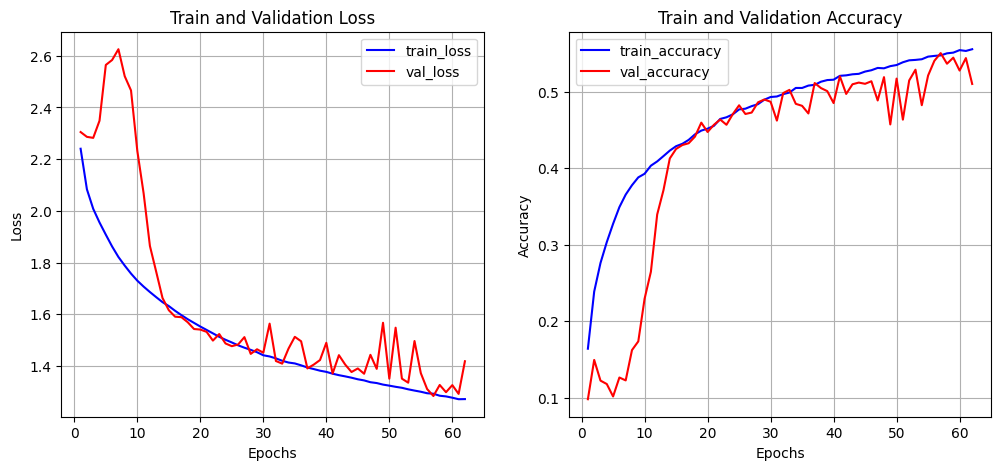

In [55]:
show_history_c(history)

In [56]:
model.evaluate(x_test, y_test)

313/313 [==============================] - 4s 12ms/step - loss: 1.4133 - accuracy: 0.5111


[1.4133388996124268, 0.5110999941825867]